In [1]:
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Activation,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers


Using TensorFlow backend.


# Load Data

In [0]:
(x_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
import matplotlib.pyplot as plt

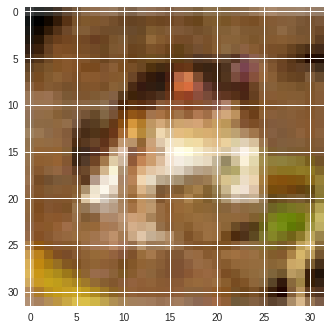

In [4]:
plt.imshow(x_train[0])

In [0]:
#import os
data_augmentation = True
epochs = 30
batch_size = 128
n_classes = 10 
#os.mkdir('Models')

# Preprocessing

In [0]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [0]:
x_train = x_train.astype('float32')
X_test  = X_test.astype('float32')

x_train /= 255
X_test /= 255

In [8]:
print("X_train shape :{}".format(x_train.shape))
print("X_test.shape  :{}".format(X_test.shape))

X_train shape :(50000, 32, 32, 3)
X_test.shape  :(10000, 32, 32, 3)


# Create Model

In [9]:
model = Sequential()

weight_decay = 1e-4

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
                 input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
__________

# Compile Model

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

# Data augmentation

In [16]:
if not data_augmentation:
  print("Not data using augmentation")
  model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), shuffle=True)
  
  
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        rotation_range=15,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.5,  # set range for random shear
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=100,
                        epochs=100,
                        validation_data=(X_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/100
100/100 [==============================] - 12s 123ms/step - loss: 0.7423 - acc: 0.7544 - val_loss: 0.6585 - val_acc: 0.7894
Epoch 2/100
100/100 [==============================] - 11s 110ms/step - loss: 0.7499 - acc: 0.7544 - val_loss: 0.8442 - val_acc: 0.7307
Epoch 3/100
100/100 [==============================] - 11s 110ms/step - loss: 0.7619 - acc: 0.7472 - val_loss: 1.0440 - val_acc: 0.6929
Epoch 4/100
100/100 [==============================] - 12s 116ms/step - loss: 0.7432 - acc: 0.7573 - val_loss: 0.6905 - val_acc: 0.7752
Epoch 5/100
100/100 [==============================] - 11s 111ms/step - loss: 0.7210 - acc: 0.7639 - val_loss: 0.7317 - val_acc: 0.7611
Epoch 6/100
100/100 [==============================] - 11s 113ms/step - loss: 0.7269 - acc: 0.7634 - val_loss: 0.8196 - val_acc: 0.7415
Epoch 7/100
100/100 [==============================] - 11s 111ms/step - loss: 0.7200 - acc: 0.7666 - val_loss: 0.6574 - val_acc: 0.7873
Epoch 8/100
1

In [0]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

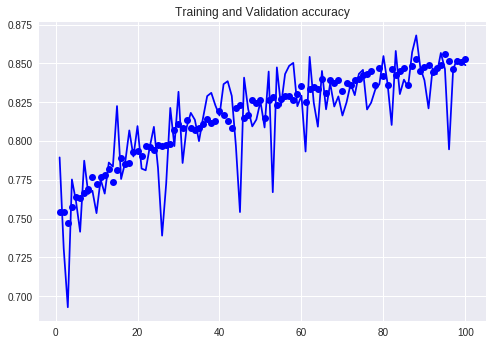

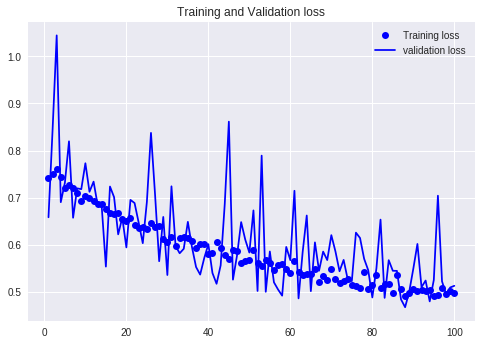

In [18]:
import matplotlib.pyplot as plt

epochs =range(1, len(acc) + 1)

plt.plot(epochs, acc,'bo' ,label='Training acc')
plt.plot(epochs, val_acc,'b', label='validation acc')
plt.title('Training and Validation accuracy')
plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()